In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
mod_train_input = pd.read_csv('mod_train_input_ratio_nan.csv')
mod_test_input = pd.read_csv('mod_test_input_ratio_nan.csv')
train_output = train_total.iloc[:, -1]

NameError: name 'train_total' is not defined

In [9]:
filler = pd.read_csv('newly_trained.csv')
filler

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,tot_bid_vol,tot_ask_vol,bid1tot,...,bid3tot,ask3tot,bid_ask3diff,bid4tot,ask4tot,bid_ask4diff,bid5tot,ask5tot,bid_ask5diff,price_change
0,0,3842.4,3842.6,2.390106,2.390106,103.0,0,35,20,30739.2,...,23050.8,3843.6,1.8,53774.0,38438.0,2.8,23042.4,7688.0,3.6,0.2
1,1,3842.8,3843.4,6.000000,6.000000,55.0,-43,31,23,26901.0,...,42266.4,15377.6,2.0,3842.0,3844.6,2.6,23050.8,49982.4,3.0,0.6
2,2,3844.0,3844.3,7.000000,7.000000,84.0,-69,41,40,11531.4,...,15372.8,38454.0,2.2,80703.0,15382.4,2.6,46113.6,34612.2,3.0,0.3
3,3,3843.8,3843.4,3.000000,3.000000,37.0,-30,41,23,38430.0,...,46108.8,3844.4,2.0,7684.0,7689.2,2.6,15365.6,42292.8,3.4,-0.4
4,4,3843.2,3843.1,3.000000,3.000000,41.0,-35,34,31,53799.2,...,7684.0,3844.6,2.6,7683.6,42292.8,3.0,15365.6,57675.0,3.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,592375,4110.2,4110.3,1.000000,1.000000,2.0,1,10,29,8220.4,...,4109.4,41120.0,2.6,12327.6,28785.4,3.0,8218.0,28788.2,3.6,0.1
592376,592376,4109.4,4110.5,6.000000,6.000000,11.0,1,18,31,12327.6,...,8217.2,28785.4,3.6,24649.2,28788.2,4.4,20540.0,20565.0,5.0,1.1
592377,592377,4109.4,4110.5,0.000000,0.000000,0.0,0,18,31,12327.6,...,8217.2,28785.4,3.6,24649.2,28788.2,4.4,20540.0,20565.0,5.0,1.1
592378,592378,4109.4,4110.5,0.000000,0.000000,0.0,0,18,31,12327.6,...,8217.2,28785.4,3.6,24649.2,28788.2,4.4,20540.0,20565.0,5.0,1.1


In [10]:
filler.shape

(592380, 25)

In [4]:
train_input = pd.read_csv('train.csv').iloc[:, :-1]

In [124]:
mod_train_tot = pd.concat((mod_train_input, train_output), axis='columns')

In [273]:
mod_test_input

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1tot,ask1tot,bid2tot,ask2tot,bid3tot,ask3tot,bid4tot,ask4tot,bid5tot,ask5tot,price_change
0,592380,5178.4,5178.3,1.0,11.0,12.0,-10,15534.6,5178.4,82848.0,20714.4,15533.4,5178.8,5177.6,25895.0,5177.4,10359.6,-1.000000e-01
1,592381,5133.0,5132.9,1.0,0.0,1.0,1,5132.8,20532.0,10265.2,41065.6,10264.8,5133.8,5132.2,5134.0,51320.0,5134.2,-1.000000e-01
2,592382,5177.4,5178.0,2.0,0.0,2.0,2,41417.6,36251.6,93182.4,20716.0,5176.6,5179.2,5176.4,10358.8,31056.0,25898.0,6.000000e-01
3,592383,5093.6,5093.9,0.0,2.0,2.0,-1,40745.6,5094.6,25465.0,5094.8,20371.2,56045.0,15276.6,30571.2,5092.0,10190.8,3.000000e-01
4,592384,5189.2,5189.2,0.0,0.0,0.0,0,5188.8,15568.8,25943.0,10381.2,5188.4,5190.8,15564.6,15573.0,15564.0,20764.8,1.818989e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,784234,5150.6,5150.8,0.0,0.0,0.0,0,5150.6,5151.0,25752.0,15454.2,15450.6,5151.6,20600.0,15456.0,10299.6,10304.8,2.000000e-01
191855,784235,5122.6,5122.7,1.0,2.0,3.0,-1,15367.8,81964.8,5122.4,87091.0,25611.0,20492.8,5121.8,5123.4,102432.0,81977.6,1.000000e-01
191856,784236,5192.8,5192.3,0.0,0.0,0.0,0,5192.0,5192.6,10383.6,10385.6,5191.2,5193.0,5190.4,10386.4,5190.2,5193.4,-5.000000e-01
191857,784237,5152.0,5151.9,4.0,2.0,6.0,2,20607.2,36064.0,25758.0,5152.2,30908.4,10304.8,41209.6,5152.6,190587.0,5152.8,-1.000000e-01


In [3]:
mod_test_input

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1tot,ask1tot,bid2tot,ask2tot,bid3tot,ask3tot,bid4tot,ask4tot,bid5tot,ask5tot,price_change
0,592380,5178.4,5178.3,1.0,11.0,12.0,-10,15534.6,5178.4,82848.0,20714.4,15533.4,5178.8,5177.6,25895.0,5177.4,10359.6,-1.000000e-01
1,592381,5133.0,5132.9,1.0,0.0,1.0,1,5132.8,20532.0,10265.2,41065.6,10264.8,5133.8,5132.2,5134.0,51320.0,5134.2,-1.000000e-01
2,592382,5177.4,5178.0,2.0,0.0,2.0,2,41417.6,36251.6,93182.4,20716.0,5176.6,5179.2,5176.4,10358.8,31056.0,25898.0,6.000000e-01
3,592383,5093.6,5093.9,0.0,2.0,2.0,-1,40745.6,5094.6,25465.0,5094.8,20371.2,56045.0,15276.6,30571.2,5092.0,10190.8,3.000000e-01
4,592384,5189.2,5189.2,0.0,0.0,0.0,0,5188.8,15568.8,25943.0,10381.2,5188.4,5190.8,15564.6,15573.0,15564.0,20764.8,1.818989e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,784234,5150.6,5150.8,0.0,0.0,0.0,0,5150.6,5151.0,25752.0,15454.2,15450.6,5151.6,20600.0,15456.0,10299.6,10304.8,2.000000e-01
191855,784235,5122.6,5122.7,1.0,2.0,3.0,-1,15367.8,81964.8,5122.4,87091.0,25611.0,20492.8,5121.8,5123.4,102432.0,81977.6,1.000000e-01
191856,784236,5192.8,5192.3,0.0,0.0,0.0,0,5192.0,5192.6,10383.6,10385.6,5191.2,5193.0,5190.4,10386.4,5190.2,5193.4,-5.000000e-01
191857,784237,5152.0,5151.9,4.0,2.0,6.0,2,20607.2,36064.0,25758.0,5152.2,30908.4,10304.8,41209.6,5152.6,190587.0,5152.8,-1.000000e-01


In [129]:
sum(n > 0 for n in train_output)

211455

In [130]:
sum(n < 1 for n in train_output) - sum(n > 0 for n in train_output)

169470

In [131]:
len(train_output) - (sum(n < 1 for n in train_output) - sum(n > 0 for n in train_output))

422910

In [82]:
len(train_output)/2

296190.0

## Data Pre-Processing

In [186]:
train_input

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,8,1,6,14,6,6,1,1,10,2
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,7,6,11,1,6,1,4,4,1,13
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,3,1,4,21,12,1,16,10,4,9
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,10,13,12,2,4,2,7,1,2,11
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,14,12,2,2,4,1,3,1,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,592375,4110.2,4110.3,1.0,1.0,2.0,1,4110.2,4110.0,4109.4,...,2,2,1,3,2,2,3,10,7,7
592376,592376,4109.4,4110.5,6.0,5.0,11.0,1,4109.2,4109.0,4108.6,...,3,2,2,6,5,3,9,7,7,5
592377,592377,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,...,3,2,2,6,5,3,9,7,7,5
592378,592378,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,...,3,2,2,6,5,3,9,7,7,5


In [244]:
np.corrcoef(train_output, train_input_cpy['tot_ask_bid_vol_diff'])

array([[ 1.        , -0.07301584],
       [-0.07301584,  1.        ]])

In [243]:
train_input_cpy['tot_ask_bid_vol_diff'] = train_input_cpy['tot_ask_vol'] - train_input_cpy['tot_bid_vol']

In [241]:
train_input_cpy['tot_ask_vol']

0         20
1         23
2         40
3         23
4         31
          ..
592375    29
592376    31
592377    31
592378    31
592379    31
Name: tot_ask_vol, Length: 592380, dtype: int64

In [240]:
train_input_cpy['tot_ask_vol'] = train_input['ask1vol'] + train_input['ask2vol'] + train_input['ask3vol'] + train_input['ask4vol'] + train_input['ask5vol']

In [237]:
train_input_cpy['tot_bid_vol'] = train_input['bid1vol'] + train_input['bid2vol'] + train_input['bid3vol'] + train_input['bid4vol'] + train_input['bid5vol']

In [206]:
train_input_cpy = train_input.copy()
train_input_cpy['avg_bid'] = np.mean((train_input_cpy['bid1'], train_input_cpy['bid2'], train_input_cpy['bid3'], train_input_cpy['bid4'], train_input_cpy['bid5']))
# train_input_cpy['mid_avg_bid_diff'] = train_input_cpy['mid'] - np.mean((train_input_cpy['bid1'], train_input_cpy['bid2'], train_input_cpy['bid3'], train_input_cpy['bid4'], train_input_cpy['bid5']))

In [246]:
train_new = train_input.copy()
train_new['diff_1'] = train_new['ask1'] - train_new['bid1']
train_new['diff_2'] = train_new['ask2'] - train_new['bid2']
train_new['diff_3'] = train_new['ask3'] - train_new['bid3']
train_new['diff_4'] = train_new['ask4'] - train_new['bid4']
train_new['diff_5'] = train_new['ask5'] - train_new['bid5']


# train_input_cpy['mid_avg_bid_diff'] = train_input_cpy['mid'] - np.mean((train_input_cpy['bid1'], train_input_cpy['bid2'], train_input_cpy['bid3'], train_input_cpy['bid4'], train_input_cpy['bid5']))

In [247]:
train_new

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,diff_1
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,1,6,14,6,6,1,1,10,2,0.4
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,6,11,1,6,1,4,4,1,13,0.8
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,1,4,21,12,1,16,10,4,9,1.0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,13,12,2,4,2,7,1,2,11,0.8
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,12,2,2,4,1,3,1,11,15,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,592375,4110.2,4110.3,1.0,1.0,2.0,1,4110.2,4110.0,4109.4,...,2,1,3,2,2,3,10,7,7,0.2
592376,592376,4109.4,4110.5,6.0,5.0,11.0,1,4109.2,4109.0,4108.6,...,2,2,6,5,3,9,7,7,5,2.6
592377,592377,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,...,2,2,6,5,3,9,7,7,5,2.6
592378,592378,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,...,2,2,6,5,3,9,7,7,5,2.6


In [214]:
train_input_cpy['bid_ask_diff'] = train_input_cpy['ask1'] - train_input_cpy['bid1']

In [7]:
import matplotlib.pyplot as plt

In [212]:
train_input_cpy.iloc[:, :3]

,id,last_price,mid
0,0,3842.4,3842.6
1,1,3842.8,3843.4
2,2,3844.0,3844.3
3,3,3843.8,3843.4
4,4,3843.2,3843.1
...,...,...,...
592375,592375,4110.2,4110.3
592376,592376,4109.4,4110.5
592377,592377,4109.4,4110.5
592378,592378,4109.4,4110.5


In [216]:
train_output[:30]

0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    0
11    1
12    0
13    0
14    1
15    1
16    1
17    0
18    0
19    0
20    1
21    1
22    0
23    0
24    0
25    0
26    1
27    1
28    1
29    0
Name: y, dtype: int64

In [224]:
res = [train_input_cpy['bid_ask_diff'].iloc[i] - train_input_cpy['bid_ask_diff'].iloc[i-1] for i in range(len(train_input_cpy))]

In [221]:
train_input_cpy['bid_ask_diff']

0     0.4
1     0.8
2     1.0
3     0.8
4     0.6
5     0.8
6     1.0
7     0.6
8     0.6
9     0.8
10    0.2
11    0.2
12    0.4
13    0.8
14    1.0
15    0.4
16    0.2
17    0.2
18    0.4
19    0.2
20    0.6
21    0.6
22    0.8
23    0.6
24    0.2
25    0.4
26    0.2
27    0.6
28    0.4
29    0.2
Name: bid_ask_diff, dtype: float64

In [209]:
train_input_cpy.iloc[:, 7:17]

,bid1,bid2,bid3,bid4,bid5,ask1,ask2,ask3,ask4,ask5
0,3842.4,3842.0,3841.8,3841.0,3840.4,3842.8,3843.4,3843.6,3843.8,3844.0
1,3843.0,3842.8,3842.4,3842.0,3841.8,3843.8,3844.0,3844.4,3844.6,3844.8
2,3843.8,3843.6,3843.2,3843.0,3842.8,3844.8,3845.0,3845.4,3845.6,3845.8
3,3843.0,3842.8,3842.4,3842.0,3841.4,3843.8,3844.0,3844.4,3844.6,3844.8
4,3842.8,3842.4,3842.0,3841.8,3841.4,3843.4,3844.0,3844.6,3844.8,3845.0
...,...,...,...,...,...,...,...,...,...,...
592375,4110.2,4110.0,4109.4,4109.2,4109.0,4110.4,4111.8,4112.0,4112.2,4112.6
592376,4109.2,4109.0,4108.6,4108.2,4108.0,4111.8,4112.0,4112.2,4112.6,4113.0
592377,4109.2,4109.0,4108.6,4108.2,4108.0,4111.8,4112.0,4112.2,4112.6,4113.0
592378,4109.2,4109.0,4108.6,4108.2,4108.0,4111.8,4112.0,4112.2,4112.6,4113.0


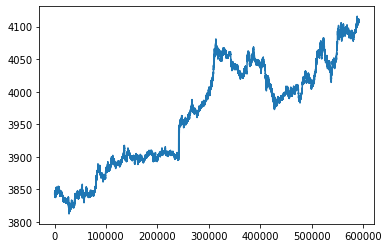

In [199]:
plt.plot(train_input.id, train_input.mid)

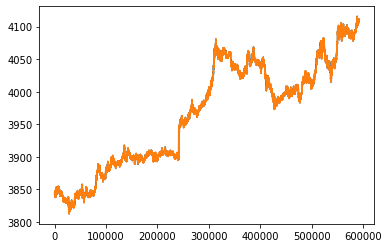

In [8]:
plt.plot(train_input.id, train_input.mid)
plt.plot(train_input.id, train_input.last_price)

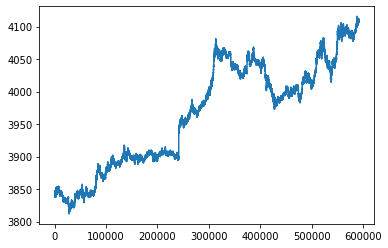

In [202]:
plt.plot(train_input.id, train_input.bid1)

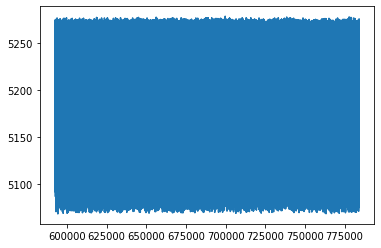

In [198]:
plt.plot(test_input.id, test_input.bid1)

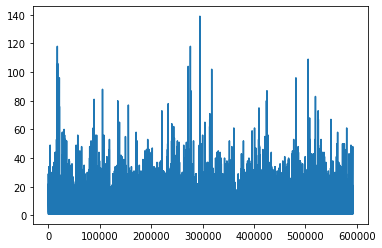

In [196]:
plt.plot(train_input.id, train_input.bid2vol)

In [188]:
train_output

0         1
1         0
2         0
3         1
4         1
         ..
592375    1
592376    0
592377    0
592378    0
592379    0
Name: y, Length: 592380, dtype: int64

In [187]:
test_input

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,592380,5178.4,5178.3,1.0,11.0,12.0,-10,5178.2,5178.0,5177.8,...,3,16,3,1,1,1,4,1,5,2
1,592381,5133.0,5132.9,1.0,0.0,1.0,1,5132.8,5132.6,5132.4,...,1,2,2,1,10,4,8,1,1,1
2,592382,5177.4,5178.0,2.0,0.0,2.0,2,5177.2,5176.8,5176.6,...,8,18,1,1,6,7,4,1,2,5
3,592383,5093.6,5093.9,0.0,2.0,2.0,-1,5093.2,5093.0,5092.8,...,8,5,4,3,1,1,1,11,6,2
4,592384,5189.2,5189.2,NaN,NaN,0.0,0,5188.8,5188.6,5188.4,...,1,5,1,3,3,3,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,784234,5150.6,5150.8,NaN,NaN,0.0,0,5150.6,5150.4,5150.2,...,1,5,3,4,2,1,3,1,3,2
191855,784235,5122.6,5122.7,1.0,2.0,3.0,-1,5122.6,5122.4,5122.2,...,3,1,5,1,20,16,17,4,1,16
191856,784236,5192.8,5192.3,NaN,NaN,0.0,0,5192.0,5191.8,5191.2,...,1,2,1,1,1,1,2,1,2,1
191857,784237,5152.0,5151.9,4.0,2.0,6.0,2,5151.8,5151.6,5151.4,...,4,5,6,8,37,7,1,2,1,1


In [265]:
def fill_nan_open_close_qty(input_x):
    input_x_cpy = input_x.copy()
    input_x_no_na = input_x_cpy.dropna()
    input_x_cpy.iloc[:, 3] = input_x_cpy.iloc[:, 3].fillna(np.mean(input_x_cpy.iloc[:, 5]))
    input_x_cpy.iloc[:, 4] = input_x_cpy.iloc[:, 4].fillna(input_x_cpy.iloc[:, 5] - input_x_cpy.iloc[:, 3])
    input_x_cpy.iloc[:, 3] = np.where(input_x_cpy.iloc[:, 5] == 0, 0, input_x_cpy.iloc[:, 3])
    input_x_cpy.iloc[:, 4] = np.where(input_x_cpy.iloc[:, 5] == 0, 0, input_x_cpy.iloc[:, 3])
    return input_x_cpy

In [259]:
def create_features(input_x):
    input_x_cpy = input_x.copy()
    input_x_cpy['tot_bid_vol'] = input_x_cpy['bid1vol'] + input_x_cpy['bid2vol'] + input_x_cpy['bid3vol'] + input_x_cpy['bid4vol'] + input_x_cpy['bid5vol']
    input_x_cpy['tot_ask_vol'] = input_x_cpy['ask1vol'] + input_x_cpy['ask2vol'] + input_x_cpy['ask3vol'] + input_x_cpy['ask4vol'] + input_x_cpy['ask5vol']
    for i in range(7, 12):
        input_x_cpy['bid{}tot'.format(i - 6)] = input_x_cpy['bid{}'.format(i - 6)] * input_x_cpy['bid{}vol'.format(i - 6)]
        input_x_cpy['ask{}tot'.format(i - 6)] = input_x_cpy['ask{}'.format(i - 6)] * input_x_cpy['ask{}vol'.format(i - 6)]
        input_x_cpy['bid_ask{}diff'.format(i - 6)] = input_x_cpy['ask{}'.format(i - 6)] - input_x_cpy['bid{}'.format(i - 6)]
        del input_x_cpy['bid{}'.format(i - 6)]
        del input_x_cpy['bid{}vol'.format(i - 6)]
        del input_x_cpy['ask{}'.format(i - 6)]
        del input_x_cpy['ask{}vol'.format(i - 6)]
    input_x_cpy['price_change'] = input_x_cpy['mid'] - input_x_cpy['last_price']
    return input_x_cpy

In [268]:
new_train = fill_nan_open_close_qty(create_features(train_input))

In [271]:
new_train.to_csv('newly_trained.csv', index=None)

In [276]:
mod_test_input

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1tot,ask1tot,bid2tot,ask2tot,bid3tot,ask3tot,bid4tot,ask4tot,bid5tot,ask5tot,price_change
0,592380,5178.4,5178.3,1.0,11.0,12.0,-10,15534.6,5178.4,82848.0,20714.4,15533.4,5178.8,5177.6,25895.0,5177.4,10359.6,-1.000000e-01
1,592381,5133.0,5132.9,1.0,0.0,1.0,1,5132.8,20532.0,10265.2,41065.6,10264.8,5133.8,5132.2,5134.0,51320.0,5134.2,-1.000000e-01
2,592382,5177.4,5178.0,2.0,0.0,2.0,2,41417.6,36251.6,93182.4,20716.0,5176.6,5179.2,5176.4,10358.8,31056.0,25898.0,6.000000e-01
3,592383,5093.6,5093.9,0.0,2.0,2.0,-1,40745.6,5094.6,25465.0,5094.8,20371.2,56045.0,15276.6,30571.2,5092.0,10190.8,3.000000e-01
4,592384,5189.2,5189.2,0.0,0.0,0.0,0,5188.8,15568.8,25943.0,10381.2,5188.4,5190.8,15564.6,15573.0,15564.0,20764.8,1.818989e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,784234,5150.6,5150.8,0.0,0.0,0.0,0,5150.6,5151.0,25752.0,15454.2,15450.6,5151.6,20600.0,15456.0,10299.6,10304.8,2.000000e-01
191855,784235,5122.6,5122.7,1.0,2.0,3.0,-1,15367.8,81964.8,5122.4,87091.0,25611.0,20492.8,5121.8,5123.4,102432.0,81977.6,1.000000e-01
191856,784236,5192.8,5192.3,0.0,0.0,0.0,0,5192.0,5192.6,10383.6,10385.6,5191.2,5193.0,5190.4,10386.4,5190.2,5193.4,-5.000000e-01
191857,784237,5152.0,5151.9,4.0,2.0,6.0,2,20607.2,36064.0,25758.0,5152.2,30908.4,10304.8,41209.6,5152.6,190587.0,5152.8,-1.000000e-01


In [277]:
new_test = fill_nan_open_close_qty(create_features(test_input))

In [279]:
new_test.to_csv('newly_test.csv', index = None)

In [157]:
subset = mod_train_tot.query('y > 0 or id < 332910')

In [160]:
subset.to_csv('balanced_train_tot.csv', index=None)

In [158]:
print(sum(n > 0 for n in subset.y))
print(sum(n < 1 for n in subset.y))
print(len(subset))

211455
215102
426557


## SGD Classifier

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler

In [162]:
balanced_tot = pd.read_csv('balanced_train_tot.csv')

In [165]:
balanced_input = balanced_tot.iloc[:, 1:-1]

In [174]:
balanced_output = balanced_tot.iloc[:, -1]

### Logistic Regression

In [175]:
log_clf = LogisticRegression()
log_clf.fit(balanced_input, balanced_output)
log_clf.score(balanced_input, balanced_output)

/Users/linlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6051008423258791

In [180]:
log_clf.predict_proba(balanced_input)[:30]

array([[0.00594792, 0.99405208],
       [0.0567954 , 0.9432046 ],
       [0.02637776, 0.97362224],
       [0.11337611, 0.88662389],
       [0.07821638, 0.92178362],
       [0.24153163, 0.75846837],
       [0.33512091, 0.66487909],
       [0.28193737, 0.71806263],
       [0.20612984, 0.79387016],
       [0.41537752, 0.58462248],
       [0.44808677, 0.55191323],
       [0.37937986, 0.62062014],
       [0.56424365, 0.43575635],
       [0.25517214, 0.74482786],
       [0.26590175, 0.73409825],
       [0.10786071, 0.89213929],
       [0.42978646, 0.57021354],
       [0.88259549, 0.11740451],
       [0.80198054, 0.19801946],
       [0.53444965, 0.46555035],
       [0.29019263, 0.70980737],
       [0.41053942, 0.58946058],
       [0.75120146, 0.24879854],
       [0.73653566, 0.26346434],
       [0.51303837, 0.48696163],
       [0.50969986, 0.49030014],
       [0.35829688, 0.64170312],
       [0.45907087, 0.54092913],
       [0.41151172, 0.58848828],
       [0.45203369, 0.54796631]])

## SGD Classifier

In [182]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", early_stopping=True, n_iter_no_change=1000)
sgd_clf.fit(balanced_input, balanced_output)

/Users/linlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=1000, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [183]:
sgd_clf.score(balanced_input, balanced_output)

0.5314154966393706

In [184]:
sgd_clf.predict_proba(balanced_input)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Kernel Approximation Feature Transformation on SGD and Logistic Regression

In [47]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(mod_train_input)
sgd_clf = SGDClassifier(loss="log", penalty="l2", early_stopping=True, n_iter_no_change=1000)
sgd_clf.fit(X_features, train_output)

/Users/linlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=1000, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", early_stopping=True, n_iter_no_change=1000)
sgd_clf.fit(mod_train_input, train_output)

/Users/linlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=1000, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
log_clf = LogisticRegression()
log_clf.fit(X_features, train_output)
log_clf.score(X_features, train_output)

/Users/linlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6430416286842905

In [56]:
log_prob_arr = log_clf.predict_proba(X_features)

In [78]:
log_clf.predict(X_features)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
df = pd.DataFrame(log_prob_arr)
df[df.iloc[:, 0] < 0.5]

,0,1


In [79]:
len(X_features)

592380

In [64]:
diff = log_prob_arr[:, 1] - train_output
count = 0
sum(n < 0 for n in diff.values.flatten())

211455

In [31]:
# Accuracy of trained model
sgd_clf.score(mod_train_input, train_output)

0.643063574057193

In [49]:
# Accuracy of trained model
sgd_clf.score(X_features, train_output)

0.6430416286842905

In [70]:
sgd_clf.predict_proba(X_features)[870:990]

array([[0.65292819, 0.34707181],
       [0.64027397, 0.35972603],
       [0.64096082, 0.35903918],
       [0.63519037, 0.36480963],
       [0.63731031, 0.36268969],
       [0.64918652, 0.35081348],
       [0.64031265, 0.35968735],
       [0.6360353 , 0.3639647 ],
       [0.63579952, 0.36420048],
       [0.64187007, 0.35812993],
       [0.62558335, 0.37441665],
       [0.64398187, 0.35601813],
       [0.63829214, 0.36170786],
       [0.64102163, 0.35897837],
       [0.63884811, 0.36115189],
       [0.63799794, 0.36200206],
       [0.66043015, 0.33956985],
       [0.64371319, 0.35628681],
       [0.63674025, 0.36325975],
       [0.65120643, 0.34879357],
       [0.6388325 , 0.3611675 ],
       [0.64915904, 0.35084096],
       [0.63348129, 0.36651871],
       [0.65131928, 0.34868072],
       [0.64306375, 0.35693625],
       [0.64545157, 0.35454843],
       [0.64136263, 0.35863737],
       [0.64803173, 0.35196827],
       [0.64630867, 0.35369133],
       [0.63554541, 0.36445459],
       [0.

## Training on Subset with Even Numbers of 0's and 1's

In [86]:
zero_indices = train_output < 1
one_indices = train_output > 0

In [96]:
subset_train_data = mod_train_input[zero_indices]
subset_train_data

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1tot,ask1tot,bid2tot,ask2tot,bid3tot,ask3tot,bid4tot,ask4tot,bid5tot,ask5tot,price_change
1,3842.8,3843.4,6.0,49.0,55.0,-43,26901.0,3843.8,23056.8,15376.0,42266.4,15377.6,3842.0,3844.6,23050.8,49982.4,0.6
2,3844.0,3844.3,7.0,77.0,84.0,-69,11531.4,3844.8,3843.6,61520.0,15372.8,38454.0,80703.0,15382.4,46113.6,34612.2,0.3
5,3843.6,3844.2,12.0,17.0,29.0,-5,3843.8,3844.6,23060.4,46137.6,3843.2,57675.0,7686.0,38454.0,65327.6,11536.8,0.6
6,3843.6,3844.3,2.0,37.0,39.0,-34,3843.8,42292.8,26903.8,57675.0,3843.2,38454.0,3843.0,11536.8,65327.6,34612.2,0.7
7,3844.8,3843.5,4.0,24.0,28.0,-20,3843.2,7687.6,7686.0,46128.0,65327.6,26913.6,3842.6,61520.0,46108.8,38454.0,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592372,4111.8,4111.1,13.0,3.0,16.0,10,4110.4,20559.0,4110.0,41120.0,4109.8,28785.4,16437.6,28788.2,12327.6,20565.0,-0.7
592376,4109.4,4110.5,6.0,5.0,11.0,1,12327.6,12335.4,8218.0,37008.0,8217.2,28785.4,24649.2,28788.2,20540.0,20565.0,1.1
592377,4109.4,4110.5,0.0,0.0,0.0,0,12327.6,12335.4,8218.0,37008.0,8217.2,28785.4,24649.2,28788.2,20540.0,20565.0,1.1
592378,4109.4,4110.5,0.0,0.0,0.0,0,12327.6,12335.4,8218.0,37008.0,8217.2,28785.4,24649.2,28788.2,20540.0,20565.0,1.1


In [109]:
subset_length = len(zero_indices)/1.8
zeros = mod_train_input[zero_indices]
subset_data.iloc[:int(subset_length), :]
ones = mod_train_input[one_indices]
subset_data = pd.concat(zeros, ones, )

329100.0


,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1tot,ask1tot,bid2tot,ask2tot,bid3tot,ask3tot,bid4tot,ask4tot,bid5tot,ask5tot,price_change
1,3842.8,3843.4,6.0,49.0,55.0,-43,26901.0,3843.8,23056.8,15376.0,42266.4,15377.6,3842.0,3844.6,23050.8,49982.4,0.6
2,3844.0,3844.3,7.0,77.0,84.0,-69,11531.4,3844.8,3843.6,61520.0,15372.8,38454.0,80703.0,15382.4,46113.6,34612.2,0.3
5,3843.6,3844.2,12.0,17.0,29.0,-5,3843.8,3844.6,23060.4,46137.6,3843.2,57675.0,7686.0,38454.0,65327.6,11536.8,0.6
6,3843.6,3844.3,2.0,37.0,39.0,-34,3843.8,42292.8,26903.8,57675.0,3843.2,38454.0,3843.0,11536.8,65327.6,34612.2,0.7
7,3844.8,3843.5,4.0,24.0,28.0,-20,3843.2,7687.6,7686.0,46128.0,65327.6,26913.6,3842.6,61520.0,46108.8,38454.0,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508203,4032.4,4032.6,0.0,0.0,0.0,0,4032.4,16131.2,8064.4,12099.0,24192.0,8066.4,36286.2,4033.4,28221.2,4034.0,0.2
508204,4032.4,4032.6,0.0,0.0,0.0,0,12097.2,16131.2,8064.4,12099.0,24192.0,8066.4,36286.2,4033.4,28221.2,4034.0,0.2
508208,4032.6,4032.8,2.0,2.0,4.0,1,4032.6,12099.0,4032.4,8066.4,8064.4,4033.4,120960.0,4034.0,40318.0,4034.4,0.2
508209,4032.6,4032.6,0.0,0.0,0.0,0,8064.8,4032.8,8064.4,12099.0,120960.0,8066.4,40318.0,4033.4,4031.6,4034.0,0.0


In [270]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'